# Caracteristica Imagen Landsat - Rasterio

In [11]:
import os,glob

In [12]:
# Directorio de trabajo
os.chdir(r"E:\Teledeteccion_Python\Datos_espacial\Landsat\Landsat5_Practica")
os.getcwd()

'E:\\Teledeteccion_Python\\Datos_espacial\\Landsat\\Landsat5_Practica'

In [16]:
lista = glob.glob("*[1-5,7].tif")
lista

['L5_B1.tif', 'L5_B2.tif', 'L5_B3.tif', 'L5_B4.tif', 'L5_B5.tif', 'L5_B7.tif']

In [17]:
import rasterio

In [18]:
# Version paquete rasterio
print(rasterio.__version__)

1.2.3


In [24]:
# Selecciona raster
R_B1 = rasterio.open(lista[0])
R_B2 = rasterio.open(lista[1])
R_B3 = rasterio.open(lista[2])
R_B4 = rasterio.open(lista[3])
R_B5 = rasterio.open(lista[4])
R_B7 = rasterio.open(lista[5])
type(R_B1)

rasterio.io.DatasetReader

In [31]:
R_B1.bounds

BoundingBox(left=391420.7559184171, bottom=-1426893.4962475952, right=396790.7559184171, top=-1421163.4962475952)

In [32]:
# Caracteristica de la banda mediante Rasterio
print("Numero de bandas:", R_B1.count)
print("Numero de Columnas:", R_B1.width)
print("Numero de Filas:", R_B1.height)
print("Tipo de archivo bits:", R_B1.dtypes[0])
print("Parametro de transformacion:", R_B1.transform)
print("Resolucion espacial:", R_B1.transform[0], "m")
print("Extension banda:", R_B1.bounds)


Numero de bandas: 1
Numero de Columnas: 179
Numero de Filas: 191
Tipo de archivo bits: uint16
Parametro de transformacion: | 30.00, 0.00, 391420.76|
| 0.00,-30.00,-1421163.50|
| 0.00, 0.00, 1.00|
Resolucion espacial: 30.0 m
Extension banda: BoundingBox(left=391420.7559184171, bottom=-1426893.4962475952, right=396790.7559184171, top=-1421163.4962475952)


In [33]:
# Convierte array Numpy N-D
Array_R_B1 = R_B1.read(1)
Array_R_B2 = R_B2.read(1)
Array_R_B3 = R_B3.read(1)
Array_R_B4 = R_B4.read(1)
Array_R_B5 = R_B5.read(1)
Array_R_B7 = R_B7.read(1)
Array_R_B1

array([[55, 56, 56, ..., 58, 57, 57],
       [56, 56, 56, ..., 58, 58, 59],
       [57, 56, 58, ..., 57, 58, 58],
       ...,
       [57, 58, 57, ..., 57, 56, 57],
       [59, 58, 57, ..., 57, 54, 57],
       [56, 55, 57, ..., 56, 57, 58]], dtype=uint16)

In [34]:
type(Array_R_B1)

numpy.ndarray

In [35]:
import numpy as np

In [41]:
print("Valor minimo banda:", Array_R_B5.min())
print("Valor maximo banda:", Array_R_B5.max())
print("Valor promedio banda:", np.round(Array_R_B5.mean(),3))
print("Valor desviasion estandar banda:", np.round(Array_R_B5.std(),3))
print("Valor varianza banda:", np.round(Array_R_B5.var(),3))

Valor minimo banda: 15
Valor maximo banda: 137
Valor promedio banda: 53.811
Valor desviasion estandar banda: 10.447
Valor varianza banda: 109.146


In [42]:
# Crear una funcion Scala Percentil
def Percentil(bandas):
    bandas_2 = np.nanpercentile(bandas,2)
    bandas_98 = np.nanpercentile(bandas,98)
    return ((bandas - bandas_2)/(bandas_98 - bandas_2))

In [43]:
# utilizar la funcion Percentil
B5_NDC = Percentil(Array_R_B5)
B4_NDC = Percentil(Array_R_B4)
B3_NDC = Percentil(Array_R_B3)

In [44]:
# Apilamos las bandas
RGBC = np.dstack((B5_NDC,B4_NDC,B3_NDC))

In [45]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


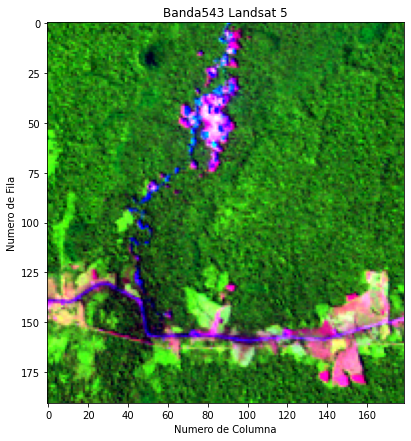

In [46]:
# visualizar RGB
plt.figure(figsize=(7,7))
plt.imshow(RGBC)
plt.title("Banda543 Landsat 5") # titulo
plt.xlabel("Numero de Columna") # etiqueta X
plt.ylabel("Numero de Fila") # etiqueta Y
plt.show()